# Task 0. Preprocessing. Map Star Ratings to Sentiment Classes

In [101]:
# Import necessary libraries
import pandas as pd
import os
import kagglehub
import re

In [102]:
# Download dataset
path = kagglehub.dataset_download("datafiniti/consumer-reviews-of-amazon-products")

# Load both datasets
df = pd.read_csv(os.path.join(path, "Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv"))
df_extra = pd.read_csv(os.path.join(path, "Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products.csv"))

In [3]:
# Display the first few rows to explore the structure
df.head()

,id,dateAdded,dateUpdated,name,asins,brand,categories,primaryCategories,imageURLs,keys,...,reviews.didPurchase,reviews.doRecommend,reviews.id,reviews.numHelpful,reviews.rating,reviews.sourceURLs,reviews.text,reviews.title,reviews.username,sourceURLs
0,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,3,https://www.amazon.com/product-reviews/B00QWO9...,I order 3 of them and one of the item is bad q...,... 3 of them and one of the item is bad quali...,Byger yang,"https://www.barcodable.com/upc/841710106442,ht..."
1,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,4,https://www.amazon.com/product-reviews/B00QWO9...,Bulk is always the less expensive way to go fo...,... always the less expensive way to go for pr...,ByMG,"https://www.barcodable.com/upc/841710106442,ht..."
2,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Well they are not Duracell but for the price i...,... are not Duracell but for the price i am ha...,BySharon Lambert,"https://www.barcodable.com/upc/841710106442,ht..."
3,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,Seem to work as well as name brand batteries a...,... as well as name brand batteries at a much ...,Bymark sexson,"https://www.barcodable.com/upc/841710106442,ht..."
4,AVpgNzjwLJeJML43Kpxn,2015-10-30T08:59:32Z,2019-04-25T09:08:16Z,AmazonBasics AAA Performance Alkaline Batterie...,"B00QWO9P0O,B00LH3DMUO",Amazonbasics,"AA,AAA,Health,Electronics,Health & Household,C...",Health & Beauty,https://images-na.ssl-images-amazon.com/images...,"amazonbasics/hl002619,amazonbasicsaaaperforman...",...,NaN,NaN,NaN,NaN,5,https://www.amazon.com/product-reviews/B00QWO9...,These batteries are very long lasting the pric...,... batteries are very long lasting the price ...,Bylinda,"https://www.barcodable.com/upc/841710106442,ht..."


In [4]:
# Display column names to identify which ones we need
print("Columns in the dataset:")
print(df.columns)

Columns in the dataset:
Index(['id', 'dateAdded', 'dateUpdated', 'name', 'asins', 'brand',
       'categories', 'primaryCategories', 'imageURLs', 'keys', 'manufacturer',
       'manufacturerNumber', 'reviews.date', 'reviews.dateSeen',
       'reviews.didPurchase', 'reviews.doRecommend', 'reviews.id',
       'reviews.numHelpful', 'reviews.rating', 'reviews.sourceURLs',
       'reviews.text', 'reviews.title', 'reviews.username', 'sourceURLs'],
      dtype='object')


In [5]:
# Show basic info (types + missing values)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28332 entries, 0 to 28331
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   28332 non-null  object 
 1   dateAdded            28332 non-null  object 
 2   dateUpdated          28332 non-null  object 
 3   name                 28332 non-null  object 
 4   asins                28332 non-null  object 
 5   brand                28332 non-null  object 
 6   categories           28332 non-null  object 
 7   primaryCategories    28332 non-null  object 
 8   imageURLs            28332 non-null  object 
 9   keys                 28332 non-null  object 
 10  manufacturer         28332 non-null  object 
 11  manufacturerNumber   28332 non-null  object 
 12  reviews.date         28332 non-null  object 
 13  reviews.dateSeen     28332 non-null  object 
 14  reviews.didPurchase  9 non-null      object 
 15  reviews.doRecommend  16086 non-null 

In [103]:
# Mapping functions
def map_rating_to_sentiment(star):
    if star in [1, 2]:
        return "Negative"
    elif star == 3:
        return "Neutral"
    elif star in [4, 5]:
        return "Positive"
    return None

In [104]:
label_map = {"Negative": 0, "Neutral": 1, "Positive": 2}

In [105]:
def clean_special_symbols(text):
    return re.sub(r"[^\w\s.,!?$%\-]", "", text)

def append_recommendation(row):
    base_text = row['full_text_clean']
    recommend = row['reviews.doRecommend']
    if recommend is True:
        return base_text + " I recommend this product."
    elif recommend is False:
        return base_text + " I do not recommend this product."
    else:
        return base_text

# Preprocessing function
def preprocess(df_input):
    df_input['sentiment'] = df_input['reviews.rating'].apply(map_rating_to_sentiment)
    df_input = df_input.dropna(subset=['sentiment', 'reviews.text'])
    df_input['label'] = df_input['sentiment'].map(label_map)
    df_input['full_text'] = df_input['reviews.title'].fillna('') + ' ' + df_input['reviews.text'].fillna('')
    df_input['full_text_clean'] = df_input['full_text'].apply(clean_special_symbols)
    df_input = df_input[df_input['full_text_clean'].apply(lambda x: len(x.split()) >= 3)].reset_index(drop=True)
    df_input['full_text_enhanced'] = df_input.apply(append_recommendation, axis=1)
    return df_input

In [106]:
# Apply preprocessing to both
df = preprocess(df)
df_extra = preprocess(df_extra)

In [107]:
# Balancing logic
current_counts = df['label'].value_counts()
target_count = current_counts.max()

needed_counts = {
    0: target_count - current_counts.get(0, 0),
    1: target_count - current_counts.get(1, 0)
}

extra_balanced = pd.concat([
    df_extra[df_extra['label'] == 0].sample(n=min(needed_counts[0], df_extra['label'].value_counts().get(0, 0)), random_state=42),
    df_extra[df_extra['label'] == 1].sample(n=min(needed_counts[1], df_extra['label'].value_counts().get(1, 0)), random_state=42)
], ignore_index=True)

df_balanced = pd.concat([df, extra_balanced], ignore_index=True)

In [108]:
# Final label distribution
print("Final Balanced Distribution:")
print(df_balanced['label'].value_counts())

Final Balanced Distribution:
label
2    25482
0     1698
1     1402
Name: count, dtype: int64


## Oversampling

In [32]:
# from sklearn.utils import resample

# # Step 1: Extract relevant columns
# df_balance = df[['full_text_enhanced', 'label']]

# # Step 2: Split the data by label
# df_pos = df_balance[df_balance['label'] == 2]
# df_neu = df_balance[df_balance['label'] == 1]
# df_neg = df_balance[df_balance['label'] == 0]

# # Step 3: Oversample Neutral and Negative to match Positive
# df_neu_upsampled = resample(df_neu, replace=True, n_samples=len(df_pos), random_state=42)
# df_neg_upsampled = resample(df_neg, replace=True, n_samples=len(df_pos), random_state=42)

# # Step 4: Combine all classes
# df_balanced = pd.concat([df_pos, df_neu_upsampled, df_neg_upsampled])

# # Step 5: Shuffle the dataset
# df_balanced = df_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

# # Step 6: Confirm class balance
# print(df_balanced['label'].value_counts())

label
1    25482
2    25482
0    25482
Name: count, dtype: int64


# Task 1. Classification with pre-trained models.

In [109]:
from sklearn.model_selection import train_test_split

# Step 1: Split 85% for training + validation, and 15% for testing
train_val_texts, test_texts, train_val_labels, test_labels = train_test_split(
    df_balanced['full_text_enhanced'].tolist(),
    df_balanced['label'].tolist(),
    test_size=0.15,
    random_state=42
)

# Step 2: Split the 85% into 70% training and 15% validation
train_texts, val_texts, train_labels, val_labels = train_test_split(
    train_val_texts,
    train_val_labels,
    test_size=0.1765,
    random_state=42
)

In [110]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
import torch

class_weights = compute_class_weight(
    class_weight="balanced",
    classes=np.unique(df_balanced['label']),
    y=df_balanced['label']
)

class_weights_tensor = torch.tensor(class_weights, dtype=torch.float)

## RoBERTa Model (`roberta-base`)

This model was fine-tuned using only the **May19 dataset**, without addressing the class imbalance.  
Although RoBERTa is a powerful transformer model, it was **excluded from further experiments** due to:

- **Lower performance** compared to other models
- **Longer training time**, which made it less practical for this task


### 📌 RoBERTa Model

In [1]:
from transformers import RobertaTokenizer, RobertaForSequenceClassification

tokenizer = RobertaTokenizer.from_pretrained('roberta-base')
model = RobertaForSequenceClassification.from_pretrained('roberta-base', num_labels=3)

text = "Replace me by any text you'd like."
encoded_input = tokenizer(text, return_tensors='pt')

output = model(**encoded_input)
logits = output.logits

In [ ]:
# Tokenize training, validation, and test texts
train_encodings = tokenizer(train_texts, truncation=True, padding=True, max_length=128)
val_encodings = tokenizer(val_texts, truncation=True, padding=True, max_length=128)
test_encodings = tokenizer(test_texts, truncation=True, padding=True, max_length=128)

In [ ]:
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Create datasets
train_dataset = ReviewDataset(train_encodings, train_labels)
val_dataset = ReviewDataset(val_encodings, val_labels)
test_dataset = ReviewDataset(test_encodings, test_labels)

In [ ]:
from transformers import TrainingArguments

training_args = TrainingArguments(
    output_dir="./roberta_results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return {
        "accuracy": accuracy_score(labels, predictions),
        "f1": f1_score(labels, predictions, average="weighted")
    }

In [ ]:
from transformers import Trainer

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    compute_metrics=compute_metrics,
)

trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.403800,0.407901,0.904975,0.859833
2,0.427700,0.406354,0.904975,0.859833
3,0.422900,0.405060,0.904975,0.859833


TrainOutput(global_step=7422, training_loss=0.41914859854991915, metrics={'train_runtime': 1679.4536, 'train_samples_per_second': 35.344, 'train_steps_per_second': 4.419, 'total_flos': 3904471562374656.0, 'train_loss': 0.41914859854991915, 'epoch': 3.0})

In [ ]:
trainer.evaluate(test_dataset)

{'eval_loss': 0.4251943528652191,
 'eval_accuracy': 0.9004951662343786,
 'eval_f1': 0.853347652568013,
 'eval_runtime': 28.121,
 'eval_samples_per_second': 150.813,
 'eval_steps_per_second': 18.883,
 'epoch': 3.0}

## 📌 BERT Model with Oversampling

In this section, the `bert-base-uncased` model was fine-tuned using only the **May19 dataset**.  
To address class imbalance, **oversampling** was applied to the training data.


### Model Experiment: BERT (bert-base-uncased)

In [35]:
from transformers import BertTokenizer, BertForSequenceClassification

bert_model_name = "bert-base-uncased"
bert_tokenizer = BertTokenizer.from_pretrained(bert_model_name)
bert_model = BertForSequenceClassification.from_pretrained(bert_model_name, num_labels=3, from_tf=True)

All TF 2.0 model weights were used when initializing BertForSequenceClassification.

All the weights of BertForSequenceClassification were initialized from the TF 2.0 model.
If your task is similar to the task the model of the checkpoint was trained on, you can already use BertForSequenceClassification for predictions without further training.


In [36]:
bert_train_encodings = bert_tokenizer(train_texts, truncation=True, padding=True, max_length=128)
bert_val_encodings = bert_tokenizer(val_texts, truncation=True, padding=True, max_length=128)
bert_test_encodings = bert_tokenizer(test_texts, truncation=True, padding=True, max_length=128)

In [37]:
class ReviewDataset(torch.utils.data.Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item["labels"] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

bert_train_dataset = ReviewDataset(bert_train_encodings, train_labels)
bert_val_dataset = ReviewDataset(bert_val_encodings, val_labels)
bert_test_dataset = ReviewDataset(bert_test_encodings, test_labels)

In [38]:
from transformers import TrainingArguments

bert_training_args = TrainingArguments(
    output_dir="./bert_results_balanced",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [39]:
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = logits.argmax(axis=-1)
    return {
        "accuracy": accuracy_score(labels, predictions),
        "f1": f1_score(labels, predictions, average="weighted")
    }

In [40]:
from transformers import Trainer

bert_trainer = Trainer(
    model=bert_model,
    args=bert_training_args,
    train_dataset=bert_train_dataset,
    eval_dataset=bert_val_dataset,
    compute_metrics=compute_metrics,
)

bert_trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.054800,0.027223,0.995204,0.995200
2,0.022000,0.025763,0.995030,0.995025
3,0.001900,0.013585,0.997995,0.997993


TrainOutput(global_step=20067, training_loss=0.06740994896509316, metrics={'train_runtime': 4373.6639, 'train_samples_per_second': 36.704, 'train_steps_per_second': 4.588, 'total_flos': 1.055939923696896e+16, 'train_loss': 0.06740994896509316, 'epoch': 3.0})

In [41]:
bert_trainer.evaluate(bert_test_dataset)

{'eval_loss': 0.013504719361662865,
 'eval_accuracy': 0.9981686578878521,
 'eval_f1': 0.9981673510350446,
 'eval_runtime': 83.1141,
 'eval_samples_per_second': 137.967,
 'eval_steps_per_second': 17.253,
 'epoch': 3.0}

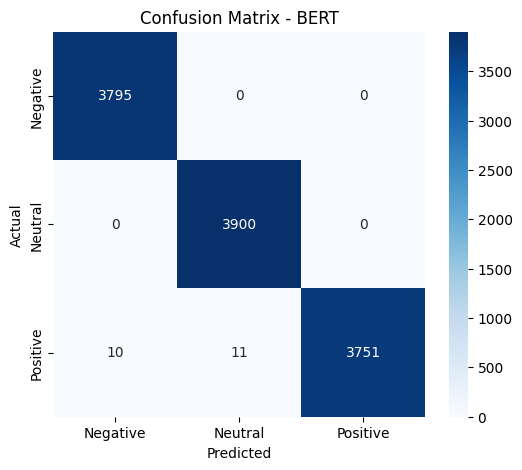

              precision    recall  f1-score   support

    Negative       1.00      1.00      1.00      3795
     Neutral       1.00      1.00      1.00      3900
    Positive       1.00      0.99      1.00      3772

    accuracy                           1.00     11467
   macro avg       1.00      1.00      1.00     11467
weighted avg       1.00      1.00      1.00     11467



In [42]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

predictions = bert_trainer.predict(bert_test_dataset)
y_true = test_labels
y_pred = np.argmax(predictions.predictions, axis=1)

cm = confusion_matrix(y_true, y_pred)
labels = ["Negative", "Neutral", "Positive"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - BERT")
plt.show()

# Optional
print(classification_report(y_true, y_pred, target_names=labels))

### Manually test for BERT model

In [127]:
from transformers import BertTokenizer, BertForSequenceClassification
import torch

# Load the model and tokenizer
tokenizer = BertTokenizer.from_pretrained("./balanced_best_model_bert")
model = BertForSequenceClassification.from_pretrained("./balanced_best_model_bert")

# Input your sentence here
text = "Setup was fine, nothing unusual."

# Tokenize and predict
inputs = tokenizer(text, return_tensors="pt")
outputs = model(**inputs)
prediction = torch.argmax(outputs.logits, dim=1).item()

print("Predicted class:", prediction)  # Will print 0, 1, or 2

Predicted class: 2


## Model Experiment: DistilBERT (distilbert-base-uncased)

In [111]:
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

distilbert_model_name = "distilbert-base-uncased"

distilbert_tokenizer = DistilBertTokenizer.from_pretrained(distilbert_model_name)
distilbert_model = DistilBertForSequenceClassification.from_pretrained(distilbert_model_name, num_labels=3)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [112]:
distilbert_train_encodings = distilbert_tokenizer(train_texts, truncation=True, padding=True, max_length=128)
distilbert_val_encodings = distilbert_tokenizer(val_texts, truncation=True, padding=True, max_length=128)
distilbert_test_encodings = distilbert_tokenizer(test_texts, truncation=True, padding=True, max_length=128)

In [113]:
distilbert_train_dataset = ReviewDataset(distilbert_train_encodings, train_labels)
distilbert_val_dataset = ReviewDataset(distilbert_val_encodings, val_labels)
distilbert_test_dataset = ReviewDataset(distilbert_test_encodings, test_labels)

In [114]:
from transformers import TrainingArguments

distilbert_training_args = TrainingArguments(
    output_dir="./distilbert_results",
    evaluation_strategy="epoch",
    save_strategy="epoch",
    per_device_train_batch_size=8,
    per_device_eval_batch_size=8,
    num_train_epochs=3,
    weight_decay=0.01,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy"
)

/usr/local/lib/python3.11/dist-packages/transformers/training_args.py:1611: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [115]:
import torch.nn as nn
from transformers import Trainer

# Function to compute weighted loss using class weights
def compute_weighted_loss(logits, labels):
    # Move weights to the same device as the logits
    weights = class_weights_tensor.to(logits.device)
    loss_fn = nn.CrossEntropyLoss(weight=weights)
    return loss_fn(logits, labels)

# Custom Trainer that overrides the default loss computation to include weights
class CustomTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, num_items_in_batch=None):
        labels = inputs.pop("labels")
        outputs = model(**inputs)
        loss = compute_weighted_loss(outputs.logits, labels)
        return (loss, outputs) if return_outputs else loss

# Initialize the CustomTrainer instead of the default Trainer
distilbert_trainer = CustomTrainer(
    model=distilbert_model,
    args=distilbert_training_args,
    train_dataset=distilbert_train_dataset,
    eval_dataset=distilbert_val_dataset,
    compute_metrics=compute_metrics,
)

In [116]:
# distilbert_trainer.evaluate(distilbert_test_dataset)
distilbert_trainer.train()
distilbert_trainer.evaluate(distilbert_test_dataset)

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.681200,0.454609,0.958256,0.954820
2,0.360800,0.493572,0.968750,0.968141
3,0.223100,0.509134,0.971549,0.970892


{'eval_loss': 0.5065565705299377,
 'eval_accuracy': 0.9715485074626866,
 'eval_f1': 0.9706522785541777,
 'eval_runtime': 15.2099,
 'eval_samples_per_second': 281.922,
 'eval_steps_per_second': 35.24,
 'epoch': 3.0}

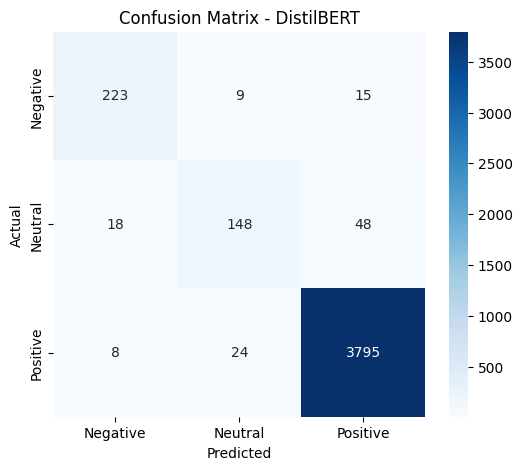

              precision    recall  f1-score   support

    Negative       0.90      0.90      0.90       247
     Neutral       0.82      0.69      0.75       214
    Positive       0.98      0.99      0.99      3827

    accuracy                           0.97      4288
   macro avg       0.90      0.86      0.88      4288
weighted avg       0.97      0.97      0.97      4288



In [117]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Predict on the test dataset using DistilBERT
predictions = distilbert_trainer.predict(distilbert_test_dataset)
y_true = test_labels
y_pred = np.argmax(predictions.predictions, axis=1)

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
labels = ["Negative", "Neutral", "Positive"]

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix - DistilBERT")
plt.show()

# Detailed classification report
print(classification_report(y_true, y_pred, target_names=labels))

## Manually test for DistilBERT model

In [125]:
# Define input
text = "Setup was fine, nothing unusual."
# Tokenize and move to model's device
inputs = distilbert_tokenizer(text, return_tensors="pt")
inputs = {k: v.to(distilbert_model.device) for k, v in inputs.items()}

# Predict
outputs = distilbert_model(**inputs)
prediction = torch.argmax(outputs.logits, dim=1).item()

# Map label
label_map = {0: "Negative", 1: "Neutral", 2: "Positive"}
print("Predicted class:", prediction, "-", label_map[prediction])

Predicted class: 1 - Neutral


### Save the best model

In [122]:
distilbert_model.save_pretrained("./Final_best_model_distilbert")
distilbert_tokenizer.save_pretrained("./Final_best_model_distilbert")

('./Final_best_model_distilbert/tokenizer_config.json',
 './Final_best_model_distilbert/special_tokens_map.json',
 './Final_best_model_distilbert/vocab.txt',
 './Final_best_model_distilbert/added_tokens.json')

In [123]:
import shutil

shutil.make_archive("Final_best_model_distilbert", "zip", "Final_best_model_distilbert")

'/content/Final_best_model_distilbert.zip'

## 📝 Final Model Evaluation Summary

During experimentation with various models and strategies, two main approaches were tested to handle data imbalance in sentiment classification:

---

### ✅ **Approach 1: Oversampling + BERT**
- **Model:** `bert-base-uncased`
- **Technique:** Used only one dataset (`May19`) with **oversampling** to balance sentiment classes.
- **Results:**  
  - Achieved high accuracy and F1-score.
  - However, the model struggled slightly with **neutral** predictions when tested on custom input sentences.
  - Training was relatively **slow and resource-intensive** compared to smaller models.

---

### ✅ **Approach 2: Weighted Loss + DistilBERT**
- **Model:** `distilbert-base-uncased`
- **Technique:** Combined data from two datasets and used **weighted loss** instead of oversampling.
- **Results:**
  - Achieved the **best overall performance**, especially for minority classes.
  - **Confusion matrix** showed balanced and reliable predictions across all classes.
  - The model successfully identified **neutral sentences** when tested manually.
  - It was also **significantly faster to train** than BERT, making it more efficient in practice.

---

### 🏁 **Conclusion**
The final model (`distilbert-base-uncased` with weighted loss and extended dataset) showed the most **reliable**, **accurate**, and **efficient** behavior.  
It was selected as the **best model** and saved for deployment and future inference.
